In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from claspy.data_loader import load_tssb_dataset, tssb_dataset_names
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
tssb = load_tssb_dataset()
tssb

,dataset,window_size,cps,time_series
0,Adiac,10,"[572, 1012, 1232]","[1.681146, 1.383394, 1.029389, 0.688386, 0.354..."
1,ArrowHead,10,[753],"[-1.957721, -1.858082, -1.657983, -1.420794, -..."
2,Beef,50,[705],"[-0.380818, -0.352238, -0.295392, -0.225041, -..."
3,BeetleFly,10,[1280],"[1.114805, 0.774403, 0.477129, 0.115781, -0.24..."
4,BirdChicken,20,[1280],"[1.697714, 1.439032, 1.22287, 0.99708, 0.76479..."
...,...,...,...,...
70,UWaveGestureLibraryX,10,"[600, 1131, 1652, 2193]","[-0.889766, 0.722005, 0.869297, -0.553167, -0...."
71,UWaveGestureLibraryY,10,"[600, 1131, 1652, 2193]","[-1.523467, -0.106794, 0.190361, 0.979247, 0.3..."
72,UWaveGestureLibraryZ,10,"[600, 1131, 1652, 2193]","[-0.527058, 0.416111, -0.524027, 0.41141, 0.12..."
73,WordSynonyms,10,"[202, 2227]","[-1.183581, -0.514028, -0.480539, -0.394855, -..."


Define some useful helper functions.

In [3]:
def tssb_time_series(dataset):
    return tssb.loc[tssb.dataset == dataset].time_series.tolist()[0]

tssb_time_series("ArrowHead")

array([-1.957721, -1.858082, -1.657983, ..., -1.54761 , -1.722706,
       -1.855437], shape=(1506,))

In [4]:
def apply_to_tssb(func):
    vals = []
    for ds in tssb_dataset_names:
        ts = tssb_time_series(ds)
        stat, p, *_ = func(ts)
        vals.append(p)
    return np.array(vals)

# Stationarity
Lets test the time series in the TSSB dataset for stationarity using the ADF and the KPSS tests.

In [5]:
adf_pvals = apply_to_tssb(adfuller)
np.any(adf_pvals >= 0.05), adf_pvals

(np.False_,
 array([8.91006717e-18, 0.00000000e+00, 3.81550798e-12, 7.98258246e-27,
        6.34465532e-28, 7.37042705e-28, 2.72743079e-23, 5.30336029e-14,
        0.00000000e+00, 0.00000000e+00, 8.24043827e-29, 0.00000000e+00,
        5.31330033e-29, 2.88998285e-29, 5.51897676e-28, 0.00000000e+00,
        4.59038439e-29, 6.51649128e-20, 5.78607807e-24, 2.75540332e-04,
        1.64543038e-23, 2.62324627e-15, 8.13639310e-30, 0.00000000e+00,
        5.16712519e-30, 0.00000000e+00, 0.00000000e+00, 3.99223874e-30,
        0.00000000e+00, 0.00000000e+00, 2.65738775e-22, 0.00000000e+00,
        3.55557211e-30, 0.00000000e+00, 3.63351091e-29, 1.90050671e-20,
        4.60533219e-20, 0.00000000e+00, 3.98095824e-18, 2.48922317e-25,
        2.25446351e-18, 1.68924957e-28, 4.57982302e-27, 0.00000000e+00,
        2.27127729e-30, 0.00000000e+00, 0.00000000e+00, 1.54528678e-15,
        0.00000000e+00, 0.00000000e+00, 4.07310504e-19, 5.99594815e-24,
        0.00000000e+00, 7.92624464e-30, 1.07687369e-

There is no time series that is not stationary according to the Augmented-Dickey-Fuller test.

In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", InterpolationWarning)
    kpss_pvals = apply_to_tssb(kpss)
    
np.all(kpss_pvals >= 0.05), kpss_pvals

(np.True_,
 array([0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.07237248, 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1  

There is no time series that is not stationary according to the Kwiatkowski-Phillips-Schmidt-Shin test.


# Periodicity
Lets the the time series in the TSSB dataset for periodicity using the autocorrelation function. Peaks at regular intervals indicate a periodic pattern.

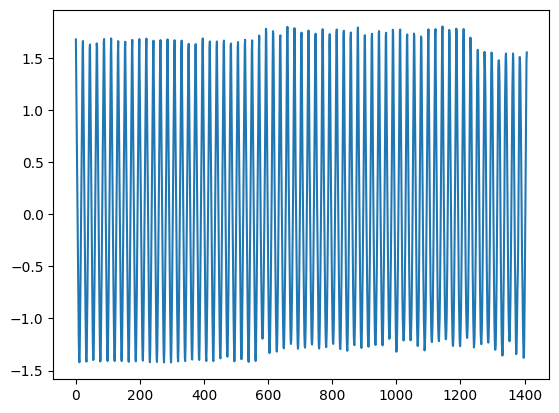

In [7]:
ts = tssb_time_series("Adiac")
plt.plot(ts)

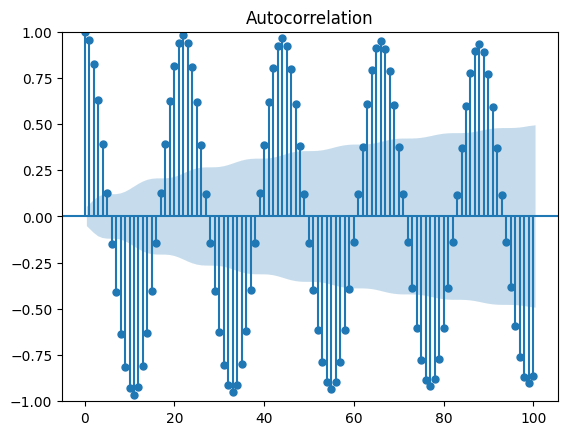

In [8]:
fig = plot_acf(ts, lags=100)

The dataset `Adiac` has peaks at regular intervals and is therefore likely periodic. This aligns with our intuition about the plot of `Adiac`.